# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
The objective is to identify what drives pricing and makes a car more or less 
expensive.

In [ ]:
Will involve exploring data analysis and model building to identify insights for 
the dealership.

In [ ]:
Use target variables: make, mileage, year, or other attributes to create a 
predictive model.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
For me to understand the dataset, I would begin by loading it into a pandas DataFrame
and using .info(), .head(), and .describe()

In [ ]:
To get an overview of the structure, data types, and basic statistics. I would then
check for missing values using .isnull().sum()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [72]:
# Load dataset
df = pd.read_csv("data/vehicles.csv")
# take a look at the data
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [22]:
df.info()
df.describe()
df.shape  # Number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(426880, 18)

In [24]:
df.isnull().sum() #data quality

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [30]:
print(df.columns) # see header names

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [32]:
df.select_dtypes(include='object').nunique()
df['manufacturer'].value_counts().head(10) #unique values

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

In [42]:
df.isnull().sum().sort_values(ascending=False)
# missing values

size            306361
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
fuel              3013
transmission      2556
year              1205
id                   0
odometer             0
region               0
cylinders            0
price                0
state                0
dtype: int64

In [46]:
# Separate columns by type
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values
df[cat_cols] = df[cat_cols].fillna('unknown')
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [56]:
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [84]:
def remove_outliers_iqr(df, column, multiplier=1.5):
    """
    Removes outliers from a specified column in the DataFrame using the IQR method.
    
    Parameters:
    - df: The DataFrame
    - column: The name of the numeric column to clean
    - multiplier: How strict the outlier cutoff is (1.5 is standard, 3 is more lenient)
    
    Returns:
    - A cleaned DataFrame with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df


In [92]:
# Remove outliers in price
df = remove_outliers_iqr(df, 'price')

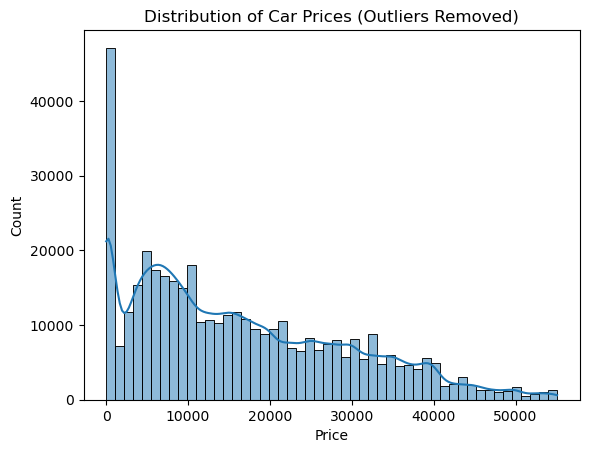

In [90]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices (Outliers Removed)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()



In [94]:
# Remove outliers in odometer
df = remove_outliers_iqr(df, 'odometer')

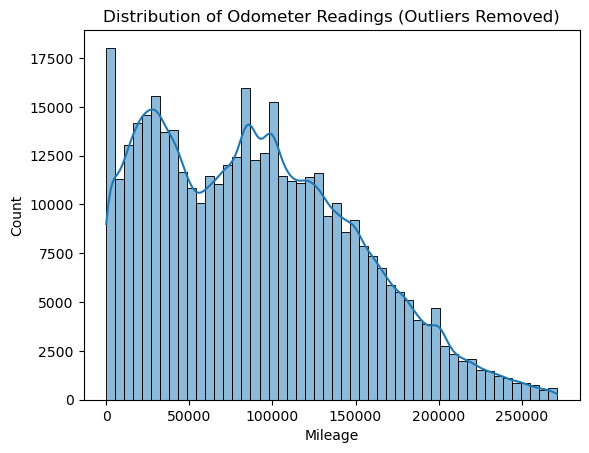

In [96]:
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title("Distribution of Odometer Readings (Outliers Removed)")
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.show()

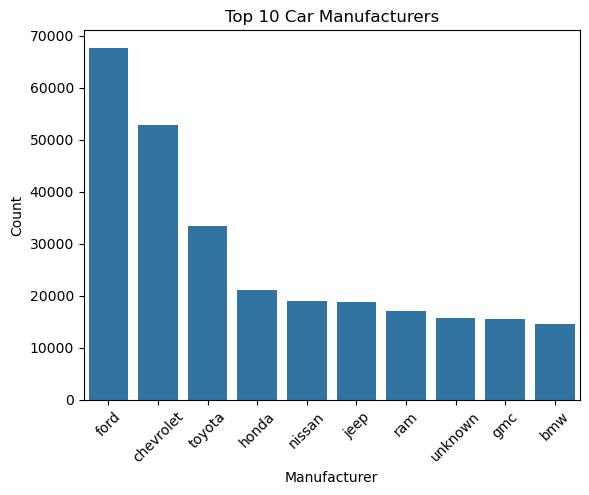

In [98]:
# Plot Top 10 Manufacturers
top_manufacturers = df['manufacturer'].value_counts().nlargest(10)

sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values)
plt.title("Top 10 Car Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

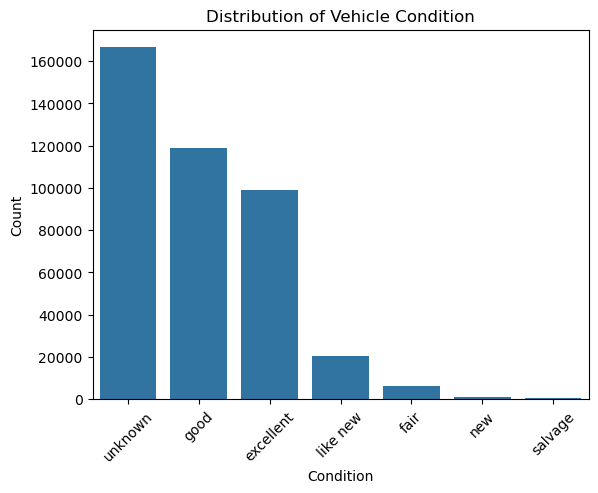

In [100]:
# Plot distribution of car condition
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.title("Distribution of Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

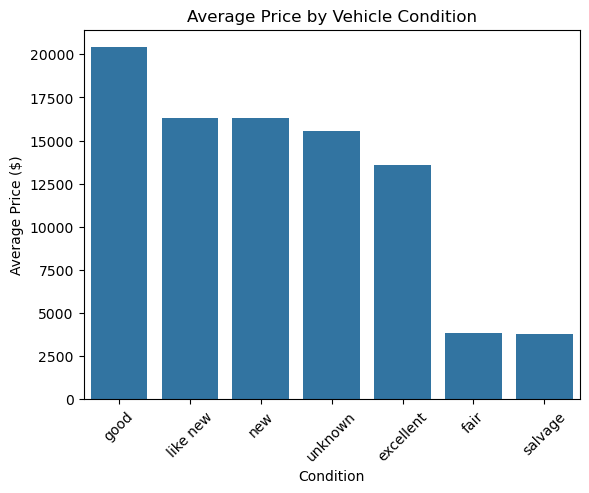

In [102]:
avg_price_by_condition = df.groupby('condition')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_by_condition.index, y=avg_price_by_condition.values)
plt.title("Average Price by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()

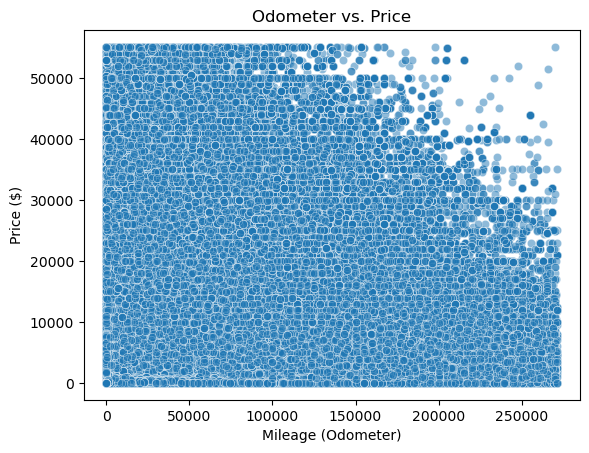

In [104]:
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5)
plt.title("Odometer vs. Price")
plt.xlabel("Mileage (Odometer)")
plt.ylabel("Price ($)")
plt.show()

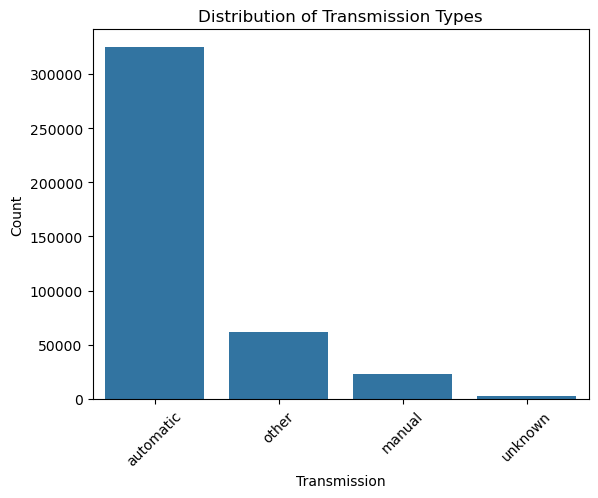

In [106]:
# Count plot of transmission types
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


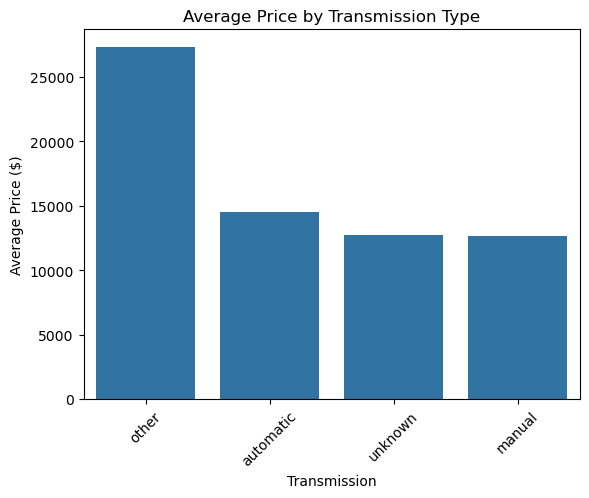

In [110]:
# average price by transmission type

avg_price_by_trans = df.groupby('transmission')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_by_trans.index, y=avg_price_by_trans.values)
plt.title("Average Price by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [48]:
import pandas as pd

df = pd.read_csv("data/vehicles.csv")

In [49]:
y = df['price']
X = df.drop(columns=['price', 'id', 'VIN', 'region', 'state', 'model'])

In [51]:
X = pd.get_dummies(X, drop_first=True)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:
X.isnull().sum().sort_values(ascending=False).head(10)

odometer                 4400
year                     1205
cylinders_3 cylinders       0
cylinders_4 cylinders       0
size_mid-size               0
size_full-size              0
drive_rwd                   0
drive_fwd                   0
transmission_other          0
transmission_manual         0
dtype: int64

In [60]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Create an imputer and apply it to X
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}:")
    print(f"  Average CV RMSE: {-scores.mean():.2f}")
    print(f"  Std Dev: {scores.std():.2f}\n")


Linear Regression:
  Average CV RMSE: 7716663.14
  Std Dev: 5306296.96

Ridge Regression:
  Average CV RMSE: 7716658.86
  Std Dev: 5306301.66

Lasso Regression:
  Average CV RMSE: 7716659.90
  Std Dev: 5306300.93

Random Forest:
  Average CV RMSE: 9376863.52
  Std Dev: 4472363.24



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
Key price drivers = car age, mileage, condition and manufacturer

In [ ]:
Dealership prioritize newer vehicles with lower mileage and excellent 
condition. 

In [ ]:
Cars from brands with strong resale value (like Toyota and Honda) tend to perform 
well in the used market.

In [ ]:
The model can be used to estimate fair prices for incoming inventory and flag 
listings that are potentially under or over-priced.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
Key insights:

In [ ]:
Mileage and Car Year Drive Price Down:
Cars with lower mileage and newer manufacturing years consistently sell for higher prices.

In [ ]:
Condition Matters:
Vehicles listed in “excellent” or “like new” condition are significantly higher priced.

In [ ]:
Brand Value:
Brands like Toyota, Honda, and Subaru retain their value well and may be strong additions to inventory.

In [ ]:
Transmission & Fuel Type:
Automatics tend to sell for more than manuals, however hybrid/electric cars may carry higher resale value.